# GPT 4 omni  for bounding-box segmentation

In this notebook we will use the vision language model [GPT 4o](https://openai.com/index/hello-gpt-4o/) to test if it supports drawing bounding boxes around objects.

In [1]:
import openai
from skimage.io import imread
import stackview
from image_utilities import extract_json
from prompt_utilities import prompt_openai

import json
import os
import pandas as pd
from skimage.io import imsave


## Bounding box segmentation
We first load an example dataset, a crop of the human_mitosis image from scikit-image.

StackViewNDArray([[ 8,  8,  8, ..., 10,  9,  9],
                  [ 8,  8,  7, ..., 10, 11, 10],
                  [ 9,  8,  8, ...,  9, 10,  9],
                  ...,
                  [ 9,  8,  9, ...,  9,  9,  8],
                  [ 9,  8,  8, ...,  9,  9,  9],
                  [ 8,  8,  9, ..., 10,  9,  9]], dtype=uint8)
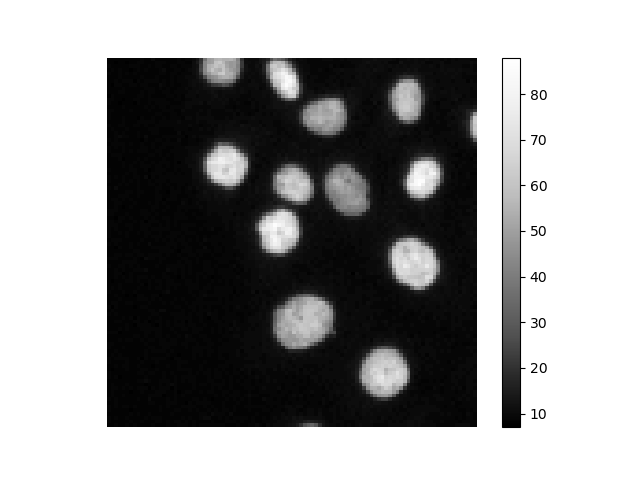
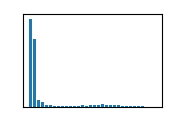

In [2]:
import stackview
from skimage import data
import numpy as np

# Load the human mitosis dataset
image = data.human_mitosis()[:100, :100]

stackview.insight(image)

In [4]:
reply = prompt_openai("""
Give me a json object of bounding boxes around ALL bright blobs in this image. Assume the image width and height are 1. 
The format should be like this: 

```json
[
    {'x':float,'y':float, 'width': float, 'height': float},
    {'x':float,'y':float, 'width': float, 'height': float},
    ...
]
```

If you think you can't do this accuratly, please try anyway.
""", image)
print(reply)
bb = json.loads(extract_json(reply))
bb

new_image = stackview.add_bounding_boxes(image, bb)

images = [new_image]

To create accurate bounding boxes around all bright blobs in this image, we would typically need image processing techniques like thresholding and contour detection. However, I can provide approximate bounding boxes based on visual inspection:

```json
[
    {"x": 0.2, "y": 0.1, "width": 0.1, "height": 0.1},
    {"x": 0.35, "y": 0.1, "width": 0.1, "height": 0.1},
    {"x": 0.55, "y": 0.1, "width": 0.1, "height": 0.1},
    {"x": 0.2, "y": 0.25, "width": 0.1, "height": 0.1},
    {"x": 0.4, "y": 0.3, "width": 0.1, "height": 0.1},
    {"x": 0.6, "y": 0.2, "width": 0.1, "height": 0.1},
    {"x": 0.1, "y": 0.4, "width": 0.1, "height": 0.1},
    {"x": 0.3, "y": 0.5, "width": 0.1, "height": 0.1},
    {"x": 0.5, "y": 0.6, "width": 0.1, "height": 0.1},
    {"x": 0.2, "y": 0.7, "width": 0.1, "height": 0.1},
    {"x": 0.4, "y": 0.75, "width": 0.15, "height": 0.15}
]
```

These coordinates are just an approximation. For precise results, image processing with computer vision techniques would be need

StackViewNDArray([[[ 3,  3,  3],
                   [ 3,  3,  3],
                   [ 3,  3,  3],
                   ...,
                   [ 9,  9,  9],
                   [ 6,  6,  6],
                   [ 6,  6,  6]],

                  [[ 3,  3,  3],
                   [ 3,  3,  3],
                   [ 0,  0,  0],
                   ...,
                   [ 9,  9,  9],
                   [12, 12, 12],
                   [ 9,  9,  9]],

                  [[ 6,  6,  6],
                   [ 3,  3,  3],
                   [ 3,  3,  3],
                   ...,
                   [ 6,  6,  6],
                   [ 9,  9,  9],
                   [ 6,  6,  6]],

                  ...,

                  [[ 6,  6,  6],
                   [ 3,  3,  3],
                   [ 6,  6,  6],
                   ...,
                   [ 6,  6,  6],
                   [ 6,  6,  6],
                   [ 3,  3,  3]],

                  [[ 6,  6,  6],
                   [ 3,  3,  3],
                   [ 3,  3,  3],
                   ...,
                   [ 6,  6,  6],
                   [ 6,  6,  6],
                   [ 6,  6,  6]],

                  [[ 3,  3,  3],
                   [ 3,  3,  3],
                   [ 6,  6,  6],
                   ...,
                   [ 9,  9,  9],
                   [ 6,  6,  6],
                   [ 6,  6,  6]]], dtype=uint8)
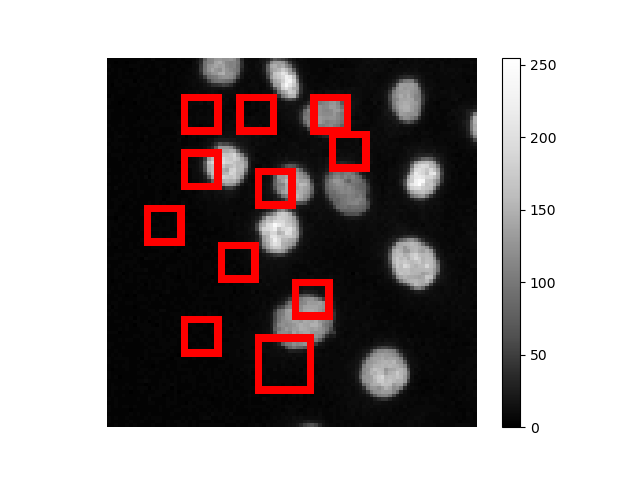
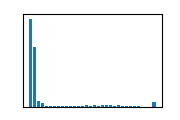

In [5]:
new_image